# ADEDAYO EYILADEOGO
# 18CJ024098
# CEN 414 DATA VISUALIZATION ASSIGNMENT
# RICE PRODUCTION IN AFRICAN COUNTRIES OVER THE YEARS

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from statistics import mean, variance, stdev, mode, median

sns.set()


In [6]:
df   = pd.read_csv('UNdata_Export_20211106_144529560.csv')
df = df.set_index('Country or Area')

df

,Element,Year,Unit,Value,Value Footnotes
Country or Area,,,,,
Algeria,Area harvested,2018.0,ha,150.0,Im
Algeria,Area harvested,2017.0,ha,155.0,Im
Algeria,Area harvested,2016.0,ha,156.0,Im
Algeria,Area harvested,2015.0,ha,169.0,Im
Algeria,Area harvested,2014.0,ha,180.0,F
...,...,...,...,...,...
fnSeqID,Footnote,NaN,NaN,NaN,NaN
*,Unofficial figure,NaN,NaN,NaN,NaN
F,FAO estimate,NaN,NaN,NaN,NaN


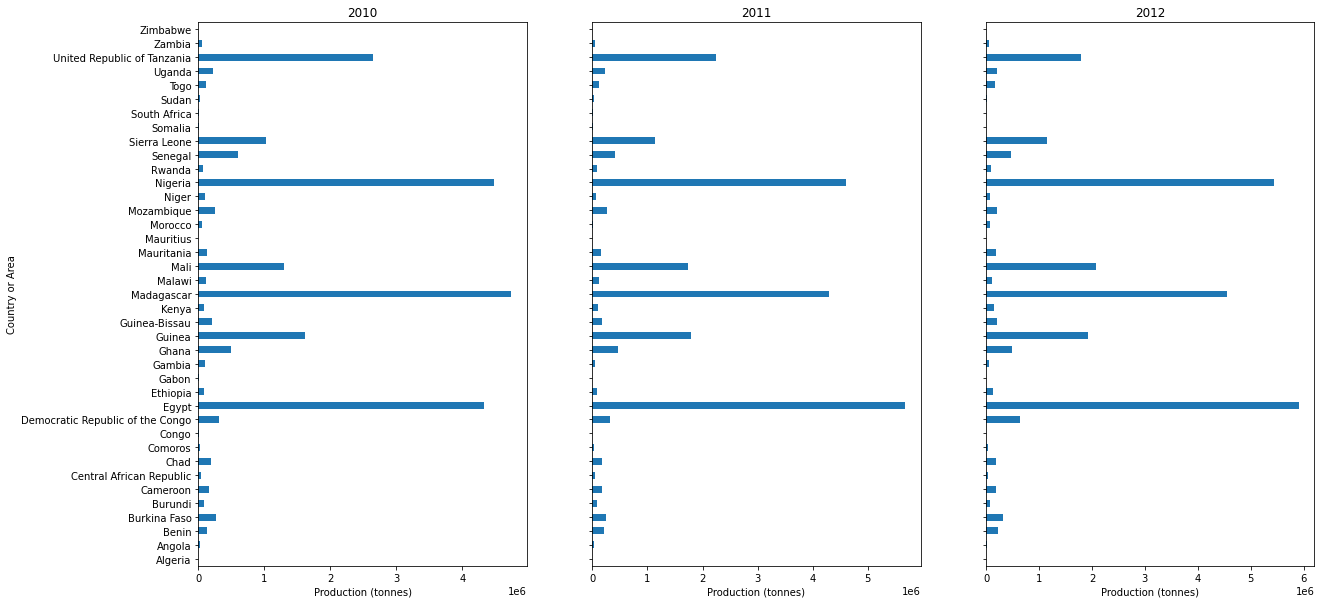

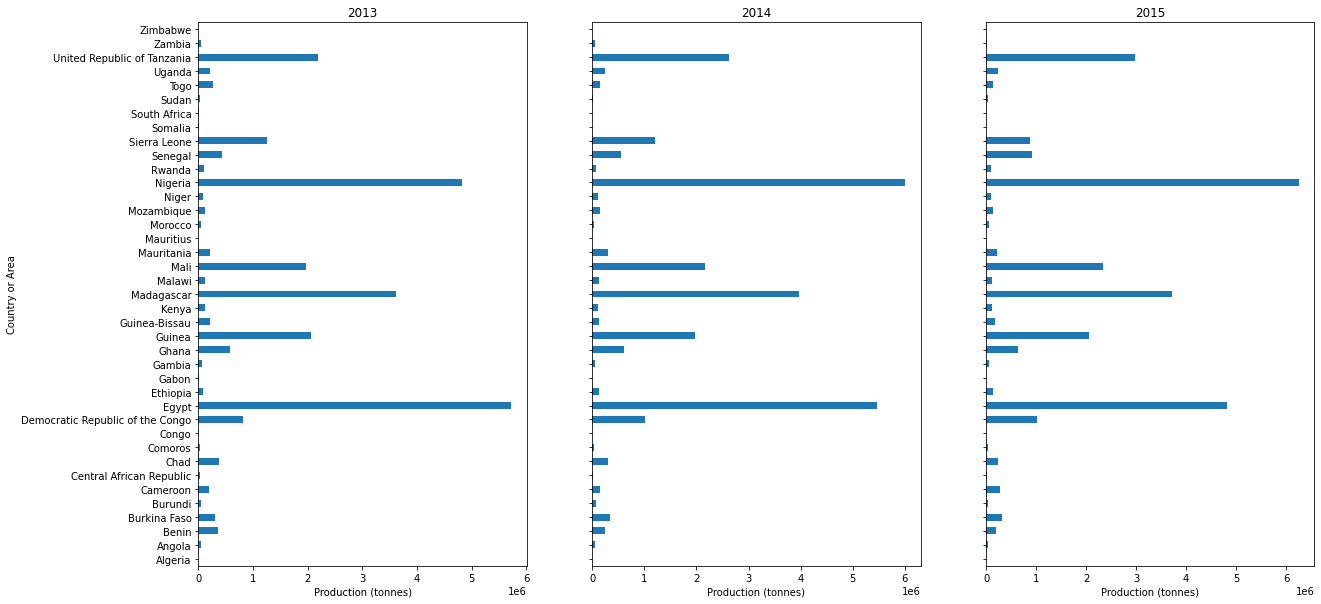

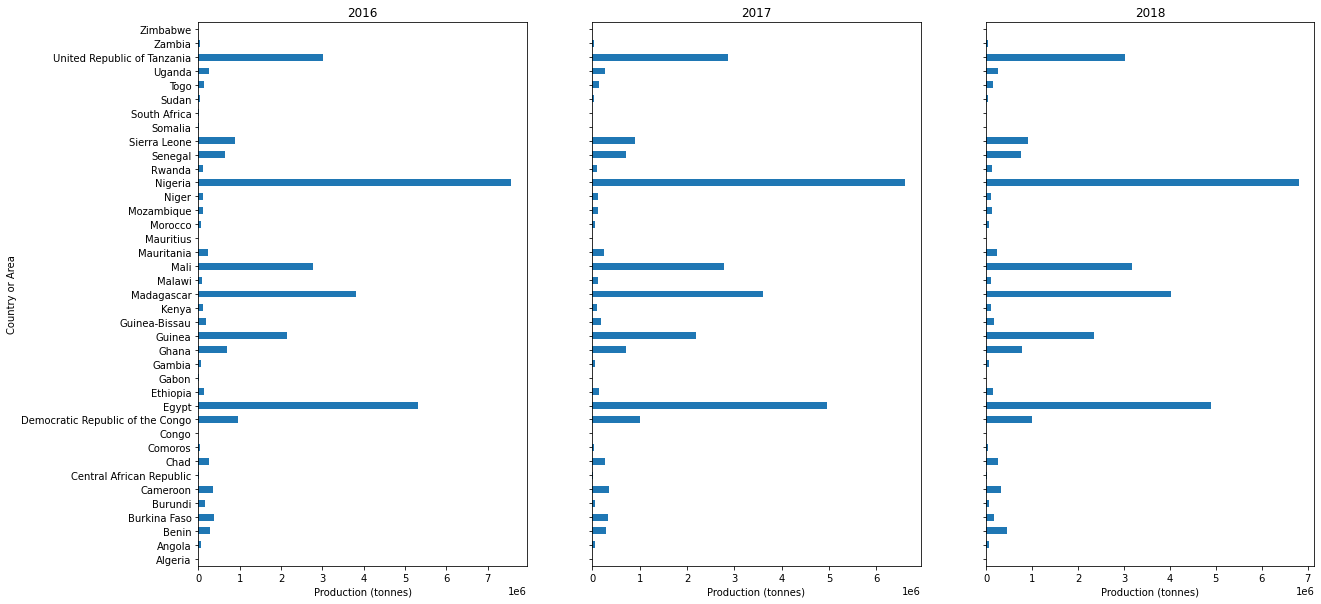

In [21]:
for i  in range(3):
    l =2010+i*3
    h = l + 3
    fig, axes = plt.subplots(1,3, figsize = (20,10), sharey=True)
    
    for idx, year in enumerate(range(l,h)):
        
        df[(df['Year'] == year) & (df['Element'] == 'Production')]['Value'].plot.barh(ax=axes[idx])
        axes[idx].set_title(year)
        axes[idx].set_xlabel('Production (tonnes)')
           

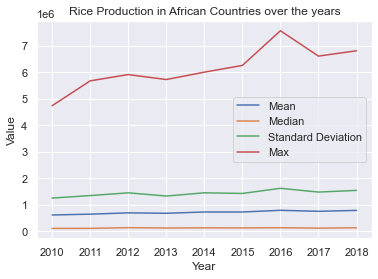

In [27]:
   def create_plot(function, label):
    dispersion_list = []
    for year in range(2010, 2019):
            dispersion_list.append(function(df[(df["Year"] == year) & (df['Element'] == 'Production')]['Value']))
            
    plt.plot(range(2010, 2019), dispersion_list, label=label)
    plt.title("Rice Production in African Countries over the years")
    plt.ylabel("Value")
    plt.xlabel("Year")
    
    
create_plot(mean, "Mean")
create_plot(median, "Median")
create_plot(stdev, "Standard Deviation")
create_plot(max, "Max")

plt.legend(loc = "best")


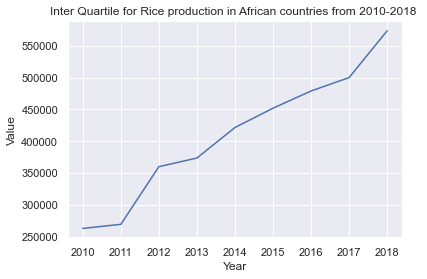

In [7]:
iqr_vals = []
def get_iqr(sample):
    q3,q1 = np.percentile(sample, [75 ,25])
    return q3 - q1

for year in range(2010,2019):
    iqr_vals.append(get_iqr(df[(df["Year"] == year) & (df['Element'] == 'Production')]['Value']))
    
    
plt.title('Inter Quartile for Rice production in African countries from 2010-2018 ')
plt.ylabel('Value')
plt.xlabel('Year')
plt.plot(range(2010,2019), iqr_vals)

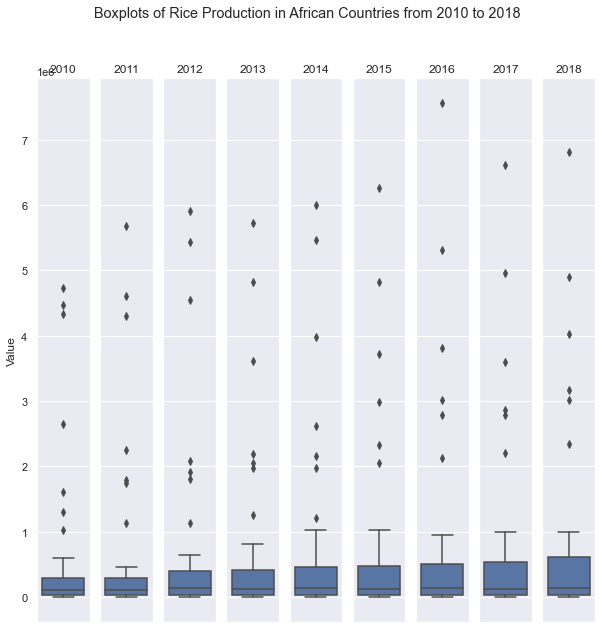

In [8]:
fig, axes  = plt.subplots(1,9, figsize=(10,10), sharey=True)
fig.suptitle('Boxplots of Rice Production in African Countries from 2010 to 2018')
axes[0].set_ylabel('Production')

for idx, year in enumerate(range(2010,2019)):
    sns.boxplot(ax = axes[idx], y = df[(df['Year'] == year) & (df['Element'] == 'Production')]['Value'])
    axes[idx].set_title(year)
    if idx > 0: axes[idx].set_ylabel('')

In [2]:
import statistics
